In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
banknote = pd.read_csv("/Users/brandonk87/Downloads/MSC 641/SVM/Banknote_authentication.csv")
banknote.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = banknote.iloc[:, :4]
y = banknote.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 13)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question 2

In [8]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel='rbf',random_state =13)
    # C is the regularization parameter (default = 1)
    # kernal can be rbf (default), linear or poly
    # degree only used with poly kernal (default is 3) 
svm.fit(x_train,y_train)
pred_test = svm.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("Classification accuracy is",accuracy_score(pred_test,y_test))
print("The MR is:",(FP + FN)/len(y_test))

[[155   0]
 [  0 120]]
The FNR is: 0.0
The FPR is: 0.0
Classification accuracy is 1.0
The MR is: 0.0


# Question 3

In [10]:
from sklearn.model_selection import KFold
from statistics import mean

cv = KFold(n_splits=5, shuffle=True, random_state=13)

model_name = ['rbf', 'linear', 'poly_2', 'poly_3', 'poly_4']
model_accuracy = []

# rbf model 
svm = SVC(C=1,kernel='rbf',random_state =13)
accuracy = []
for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test))
model_accuracy.append(mean(accuracy))
    
# linear model 
svm = SVC(C=1,kernel='linear',random_state =13)
accuracy = []
for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test)) 
model_accuracy.append(mean(accuracy))

# poly_2 model 
svm = SVC(C=1,kernel='poly',random_state =13, degree = 2)
accuracy = []
for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test))
model_accuracy.append(mean(accuracy))

# poly_3 model 
svm = SVC(C=1,kernel='poly',random_state =13, degree = 3)
accuracy = []
for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test)) 
model_accuracy.append(mean(accuracy))

# poly_4 model 
svm = SVC(C=1,kernel='poly',random_state =13, degree = 4)
accuracy = []
for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test)) 
model_accuracy.append(mean(accuracy))

In [11]:
optimal_function = pd.DataFrame({'Function': model_name, 'Accuracy': model_accuracy})
optimal_function

,Function,Accuracy
0,rbf,0.996358
1,linear,0.988334
2,poly_2,0.973768
3,poly_3,0.967939
4,poly_4,0.884820


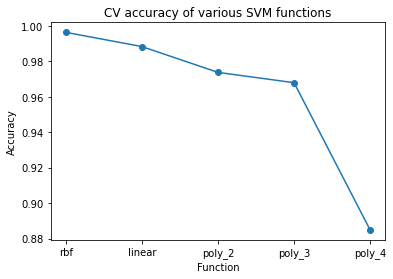

In [12]:
plt.plot(model_name, model_accuracy, marker='o')
plt.xlabel('Function')
plt.ylabel('Accuracy')
plt.title('CV accuracy of various SVM functions')
plt.show()

In [22]:
# The optimal model is the rbf model becuase it has the highest accuracy
cv = KFold(n_splits=5, shuffle=True, random_state=13)
svm = SVC(C=1,kernel='rbf',random_state =13)
accuracy = []
FNR = []
FPR = []
MR = []

for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test))
    cm = confusion_matrix(y_test, pred_test)
    TN = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TP = cm[1,1]
    FNR.append(FN/(TP+FN))
    FPR.append(FP/(FP+TN))
    MR.append((FP + FN)/len(y_test))    
print("The overall accuracy is: ",mean(accuracy))
print("The overall FNR is: ",mean(FNR))
print("The overall FPR is: ",mean(FPR))
print("The overall MR is: ",mean(MR))

The overall accuracy is:  0.9963583278035832
The overall FNR is:  0.008167566812169638
The overall FPR is:  0.0
The overall MR is:  0.003641672196416722


# Question 4

In [23]:
cv = KFold(n_splits=5, shuffle=True, random_state=13)

C_accuracy = []

for i in (0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3):
    svm = SVC(C=i,kernel='rbf',random_state =13)
    accuracy = []
    for train_index, test_index in cv.split(banknote):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svm.fit(x_train, y_train)
        pred_test = svm.predict(x_test)
        accuracy.append(accuracy_score(pred_test,y_test))
    C_accuracy.append(mean(accuracy))

In [29]:
C_values = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3]
optimal_C = pd.DataFrame({'C Value': C_values, 'Accuracy': C_accuracy})
optimal_C

,C Value,Accuracy
0,0.01,0.962100
1,0.03,0.983238
2,0.05,0.983968
3,0.10,0.988342
4,0.30,0.992717
5,0.50,0.994904
6,1.00,0.996358
7,3.00,1.000000


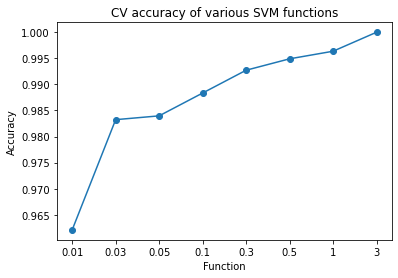

In [25]:
plt.plot(['0.01', '0.03', '0.05', '0.1', '0.3', '0.5', '1', '3'], C_accuracy, marker='o')
plt.xlabel('Function')
plt.ylabel('Accuracy')
plt.title('CV accuracy of various SVM functions')
plt.show()

In [26]:
# The optimal C is 3  becuase it has the highest accuracy
cv = KFold(n_splits=5, shuffle=True, random_state=13)
svm = SVC(C=3,kernel='rbf',random_state =13)
accuracy = []
FNR = []
FPR = []
MR = []

for train_index, test_index in cv.split(banknote):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(x_train, y_train)
    pred_test = svm.predict(x_test)
    accuracy.append(accuracy_score(pred_test,y_test))
    cm = confusion_matrix(y_test, pred_test)
    TN = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TP = cm[1,1]
    FNR.append(FN/(TP+FN))
    FPR.append(FP/(FP+TN))
    MR.append((FP + FN)/len(y_test))    
print("The overall accuracy is: ",mean(accuracy))
print("The overall FNR is: ",mean(FNR))
print("The overall FPR is: ",mean(FPR))
print("The overall MR is: ",mean(MR))

The overall accuracy is:  1.0
The overall FNR is:  0.0
The overall FPR is:  0.0
The overall MR is:  0.0


# Question 5

In [18]:
# reset the train and test values
x = banknote.iloc[:, :4]
y = banknote.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 13)

In [19]:
import statsmodels.api as sm
model = sm.Logit(y_train, sm.add_constant(x_train))
lr = model.fit()
p_pred = lr.predict(sm.add_constant(x_test))
pred_test = round(p_pred)
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("Classification accuracy is",accuracy_score(pred_test,y_test))
print("The MR is:",(FP + FN)/len(y_test))

Optimization terminated successfully.
         Current function value: 0.020203
         Iterations 14
[[155   0]
 [  0 120]]
The FNR is: 0.0
The FPR is: 0.0
Classification accuracy is 1.0
The MR is: 0.0
